In [4]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_context('notebook')
sns.set_style('white')
from scipy.io import loadmat
from sklearn import svm
pd.set_option('display.notebook_repr_html',False)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',150)
pd.set_option('display.max_seq_items',None)

In [1]:
#Functions 
#First Function Making Plotting For Data Between Positive Data & Negative Data
def Plot_Data(x,y,S):
    plt.style.use('ggplot')
    fig,ax=plt.subplots(figsize = (8,5))
    ax.set(title = 'Plotting Between Positive & Negative Data ',xlabel='Positive Data',ylabel='Negative Data')
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    plt.scatter(x[pos,0],x[pos,1],s=S,color='blue',marker='*',alpha = 0.8 ,linewidths=1,label='Poistive')
    plt.scatter(x[neg,0],x[neg,1],s=S,color='red',marker='^', alpha  = 0.8,linewidths=1,label='Negative')
    ax.legend(loc='lower left',frameon=True,shadow=True,fancybox=True,framealpha=0,borderpad=1)
#=========================================================================================================================
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    Plot_Data(X,y,6)
    #plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='y', marker='|', s=100, linewidths='5')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

************************************************************************************************************************
The Shape Of Y1_data Is ==>  (51, 1)
The Shape Of X1_data Is ==>  (51, 2)
************************************************************************************************************************


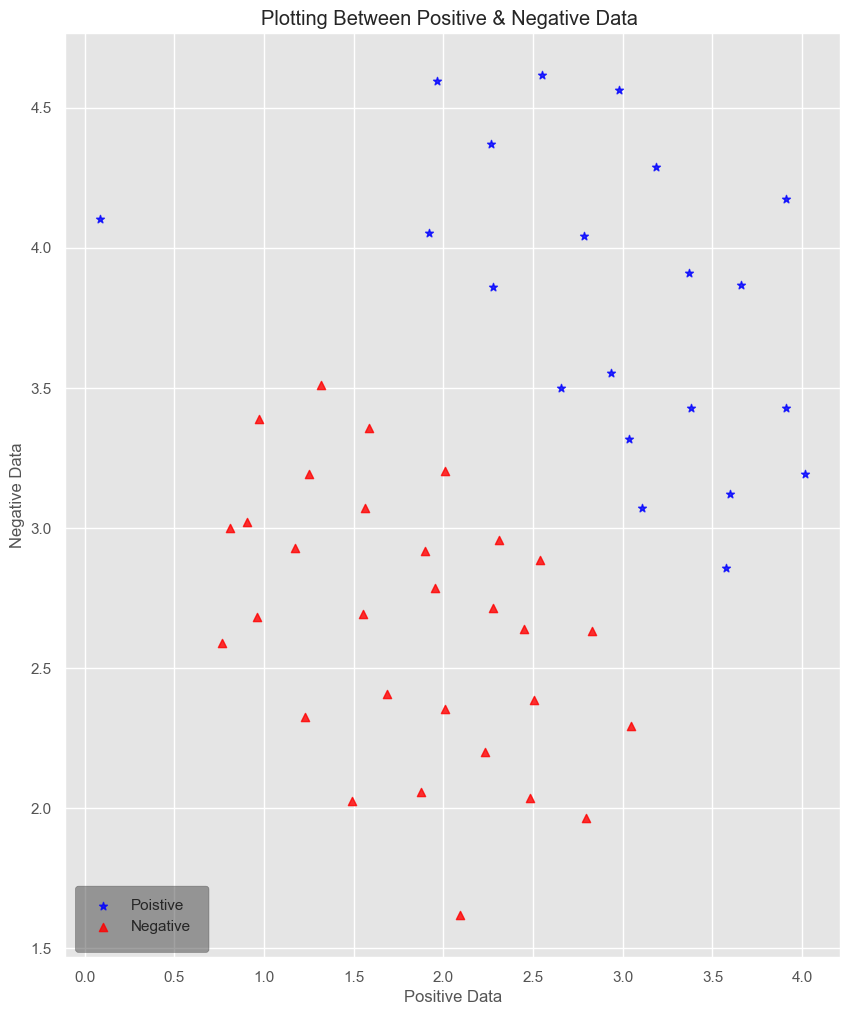

In [9]:
#Example One 
data1 = loadmat('D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\6- ex6data1.mat')
#print('The Data1 Is \n',data1)
print('****'*30)
x1_data = data1['X']
y1_data = data1['y']
print('The Shape Of Y1_data Is ==> ',y1_data.shape)
print('The Shape Of X1_data Is ==> ',x1_data.shape)
print('***'*40)
#Data Before Classfying 
Plot_Data(x1_data,y1_data,35)

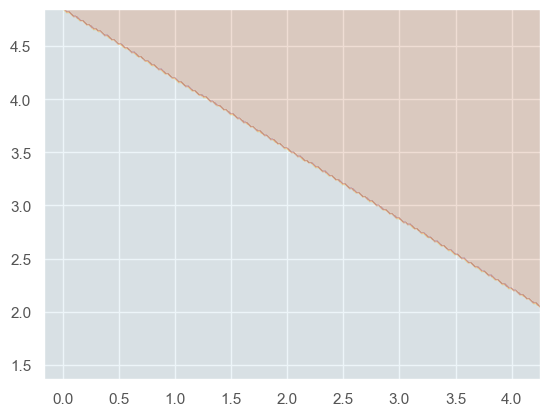

TypeError: must be real number, not str

<Figure size 1000x1200 with 1 Axes>

Number of support vectors:  12


In [10]:
#Create The Value Of Constant(C) ==> SVM Making Under Fitting(UF)
clf=svm.SVC(C=1.0,kernel='linear')
clf.fit(x1_data,y1_data.ravel())
plot_svc(clf,x1_data,y1_data)
#Create The Value Of Constant(C) ==> SVM Making Over Fitting
